In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
#plt.title("한글폰트 설정")
#plt.plot([-4, -6, 1, 2, 0, 3])

In [29]:
# 파일 불러 와서 df 에 저장
df = pd.read_csv("상가업소정보_201912_01.csv", sep='|')
pd.options.display.max_columns = 39

In [30]:
# n 변수에 각 컬럼의 결측치 갯수를 모두 합한 결과를 담습니다
n = df.isnull().sum()

In [31]:
# n 변수에 담긴 값을 정렬해서 상위 9개만 not_use 변수에 담습니다
not_use = n.sort_values(ascending=False).head(9)

In [32]:
# 저장된 결측치 데이터에서 결측치 합계를 제외하고 행제목(인덱스)들만 따로  
# not_use_col 변수에 저장합니다
not_use_col = not_use.index

In [33]:
# 변수의 값들을 갖고 df 에서 컬럼들을 제거합니다 (shape 값의 전후를 확인합니다)
print(df.shape)
df = df.drop(not_use_col, axis=1)
print(df.shape)

(573680, 39)
(573680, 30)


In [34]:
# 코드|번호 가 포함된 컬럼명을 처리하기 위해 cols 라는 변수에 컬럼이름들을 
# 담습니다
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [35]:
# 컬럼명에 "코드", "번호"가 있는 해당되는 컬럼만 찾아와서 cols_code 라는 
# 변수에 담습니다.
cols_code = cols[cols.str.contains("코드|번호")]

In [36]:
# "코드", "번호" 가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거합니다.
#  제거 전 후에 shape를 통해 컬럼이 삭제되었는지 확인합니다.
print(df.shape)
df = df.drop(cols_code, axis=1)
print(df.shape)

(573680, 30)
(573680, 16)


In [37]:
# 이전 예제를 실행하면서 필요성이 낮게 판단된 컬럼을 제거합니다
print(df.shape)
df = df.drop(['대지구분명','지번본번지','지번주소','도로명','건물본번지'],axis=1)
print(df.shape)

(573680, 16)
(573680, 11)


In [38]:
# 서울데이터만 필터링합니다
df_seoul = df[df["시도명"] == "서울특별시"]
# "seoul_open_store.csv" 라는 이름으로 저장합니다.
df_seoul.to_csv("seoul_open_store.csv", index=False)

In [41]:
df_seoul.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675


## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다.
* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [42]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다. 컬럼을 만듭니다.
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

<ipython-input-42-f6589b7fefd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()


In [43]:
df_seoul.head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922,와라와라호프


In [44]:
# 베스킨 라빈스의 검색
df_seoul.loc[df_seoul["상호명_소문자"].str.contains(\
            "배스킨라빈스|베스킨라빈스|baskinrobbins"),"상호명_소문자"].shape

(466,)

In [45]:
# 던컨도너츠 검색
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin"), \
                                                         "상호명_소문자"].shape

(191,)

In [46]:
# 둘의 검색결과를 필터링 대상으로 하여 필터링하고  df_31 에 저장합니다
df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains(\
                    '배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')]
df_31.shape

(657, 12)

In [47]:
df_31.head(3)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠테크노마트점


In [48]:
# 상호명_소문자중 배스킨라빈스 관련 상호명에대해 "배스킨라빈스" 라는 값으로
# 새로운 컬럼("브랜드명")을 채워 넣습니다
df_31.loc[df_31["상호명_소문자"].str.contains(\
        "배스킨라빈스|베스킨라빈스|baskinrobbins"), "브랜드명"] ="배스킨라빈스"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [49]:
# 브랜드명의 결측치(빈칸)에  던킨도너츠 를 채웁니다
df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")

<ipython-input-49-a1c09511293f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")


In [50]:
df_31[["상호명", "브랜드명"]].head()

,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,던킨도너츠
1819,던킨도너츠테크노마트점,던킨도너츠
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,던킨도너츠


In [51]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을  value_counts 를 통해 빈도수를 계산합니다.
df_31["상권업종대분류명"].value_counts()

음식       655
생활서비스      1
소매         1
Name: 상권업종대분류명, dtype: int64

In [52]:
# "상권업종대분류명"컬럼에서 isin 기능을 사용해서 "소매", "생활서비스" 인 
# 데이터만  검색해봅니다
df_31[df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,배스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,배스킨라빈스


In [53]:
#  &;and   |:or    ~:not  -  not 연산자를 이용해서 소매, 생활서비스가 아닌것만 
# 다시 필터링합니다
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]

In [54]:
df_31.shape

(655, 13)

#### 시각화 
* plot 으로 차트 그리기

<AxesSubplot:>

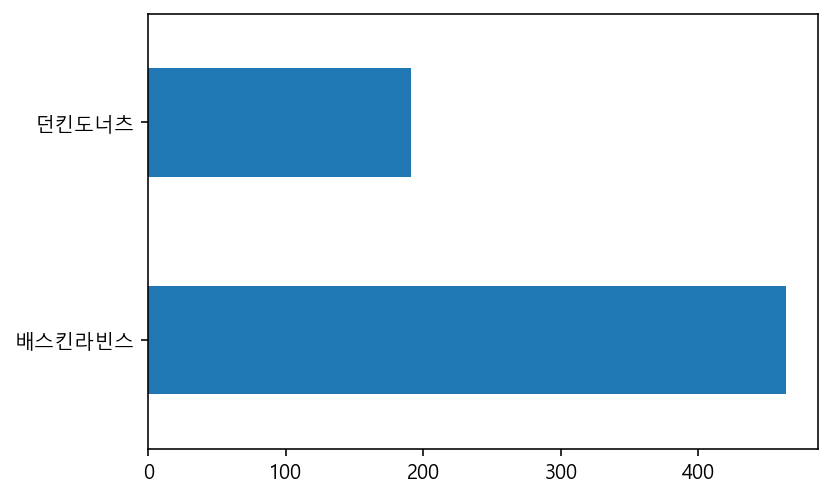

In [55]:
# 브랜드명으로 각 브랜드의 갯수를 표현합니다
df_31["브랜드명"].value_counts().plot.barh()

In [56]:
# 브랜드 명의 value_counts 값을 비율로 표시하고 이를 차트에 표현합니다
df_31["브랜드명"].value_counts(normalize=True)

배스킨라빈스    0.708397
던킨도너츠     0.291603
Name: 브랜드명, dtype: float64

<AxesSubplot:>

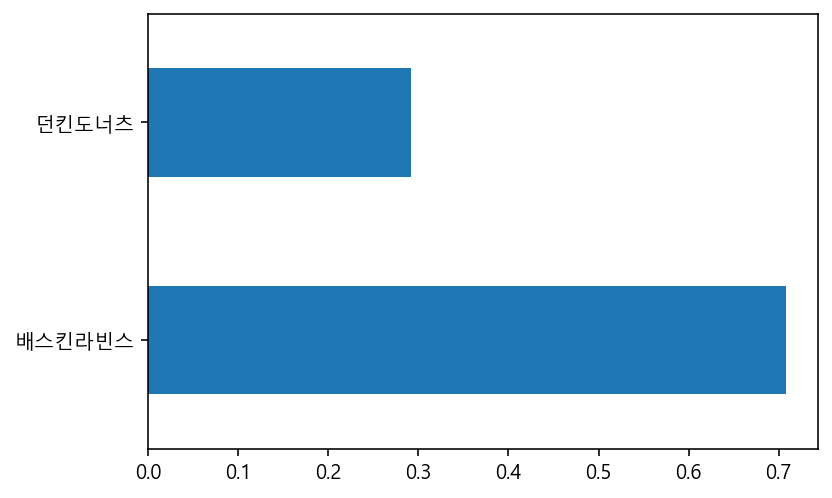

In [57]:
df_31["브랜드명"].value_counts(normalize=True).plot.barh()

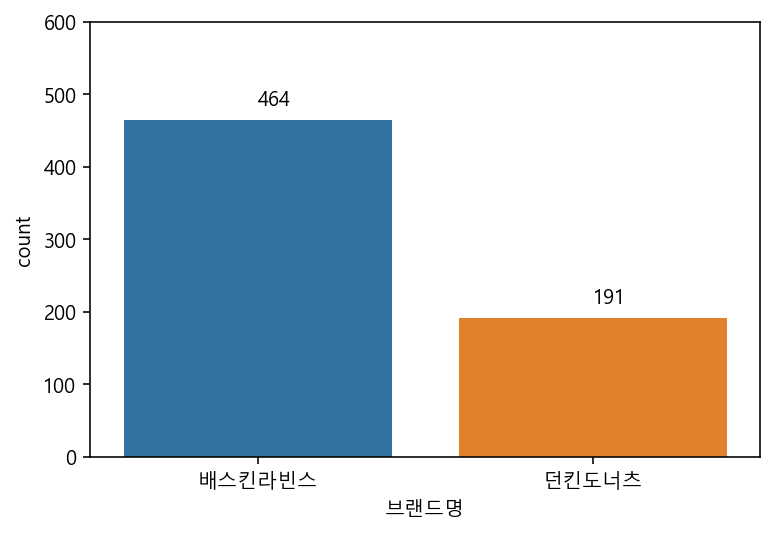

In [73]:
# seaborn 의 countplot 을 이용한 막대그래프를 그리고, 실제 값을 표시해주세요(text)
brand_count = df_31["브랜드명"].value_counts()
g = sns.countplot(data=df_31, x="브랜드명")
g.set_yticks(np.arange(0, 700, 100))
# x, y 좌표에 brand_count 값(실제값)을  표시합니다
for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i]+20, s=brand_count[i])

In [74]:
brand_count

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

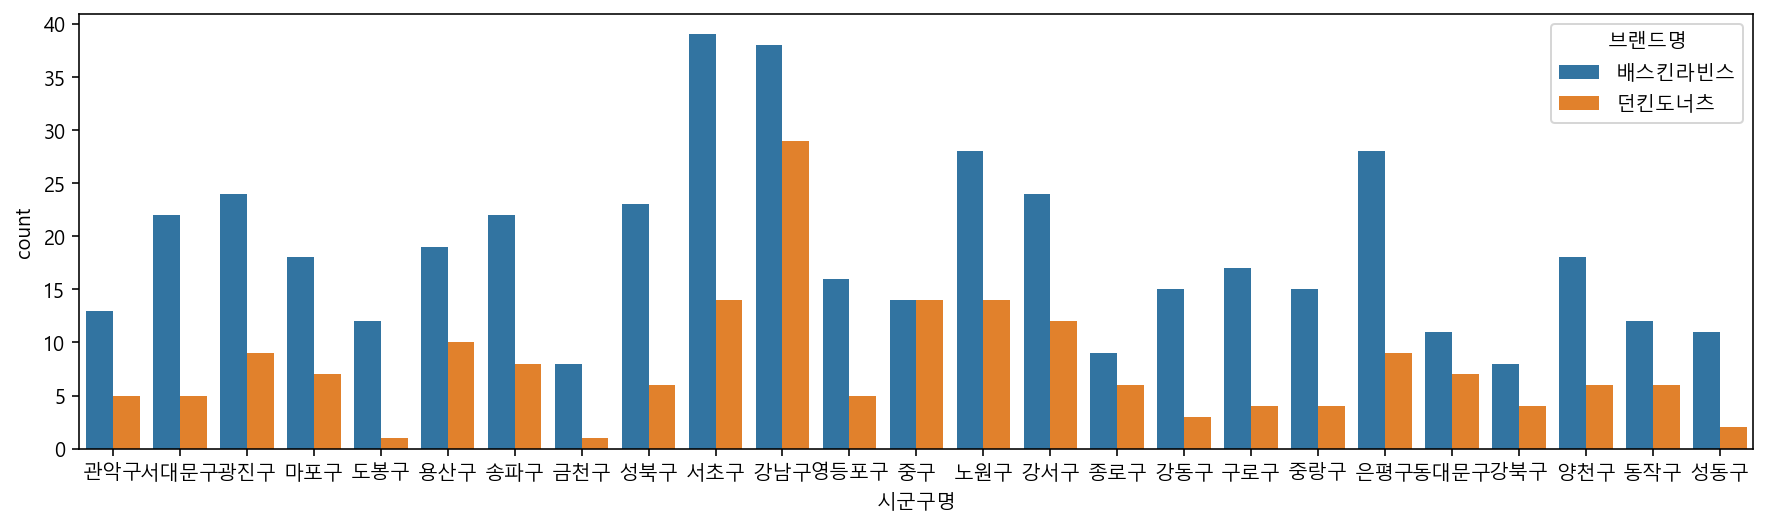

In [62]:
# 시군구명으로 빈도수를 세고 브랜드명별로 막대가 쪼개진 countplot 을 표시하세요.
plt.figure(figsize=(15,4))
g = sns.countplot(data=df_31, x = "시군구명", hue = "브랜드명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

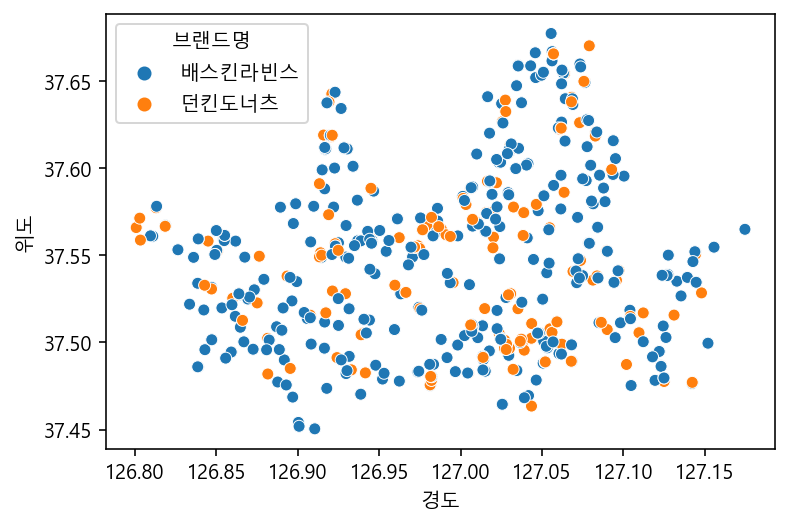

In [63]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명")

In [66]:
# Lat : 37.495593   Long : 127.039032   tooltip:'던킨도너츠'  의 값으로
# folium 맵에 마킹하세요
import folium
lat = df_31["위도"].mean()
long = df_31["경도"].mean()
m = folium.Map([lat, long], zoom_start=11)
folium.Marker([37.495593, 127.039032], tooltip="던킨도너츠").add_to(m)
m

* df_31 의 위도값들과 경도값들을 이용하여 모두 마킹해주세요
* tooltip 값은 브랜드명-도로명주소 로 설정합니다
* zoom_start 는 12 또는 11 중 적절히 설정하세요
* 던킨도너츠는 빨간색, 배스킨라빈스는 파란색으로 마킹하세요
* radius 값은 생략합니다

In [68]:
m = folium.Map([lat, long], zoom_start=12)
for i in df_31.index:
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        tooltip=title).add_to(m)
m

### MarkerCluster 로 표현하기

In [70]:
from folium.plugins import MarkerCluster
m = folium.Map([lat, long], zoom_start=12)

marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index:
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    folium.Marker(
        [sub_lat, sub_long],  icon=folium.Icon(color=icon_color),
        tooltip=title).add_to(marker_cluster)
m